In [2]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [3]:
import nest_asyncio
nest_asyncio.apply()

# Run Google Gemini in OPENAI SDK

In [4]:
import os
from agents import Agent, Runner, function_tool, AsyncOpenAI, OpenAIChatCompletionsModel, set_default_openai_client
from agents.run import RunConfig
from google.colab import userdata

# Get the GEMINI API key
gemini_api_key = userdata.get("GEMINI_API_KEY")

# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined.")

# Configure the AsyncOpenAI client to use Google's Gemini endpoint
# Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

# Create the OpenAIChatCompletionsModel instance using the configured client and model name
model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client # Explicitly pass the client
)

# Create the RunConfig using the model and the client as the provider
config = RunConfig(
    model=model,
    model_provider=external_client, # Set the client as the provider
    tracing_disabled=True
)




In [25]:
# # Define the function tools for the Help Desk Agent
# @function_tool
# def get_general_info():
#     """Provides general information about the hospital."""
#     return {
#         "hospital_name": "General Hospital",
#         "location": "Karachi, Pakistan",
#         "contact": "+92-111-111-2222",
#         "hours": "Open 24/7 for emergency. OPD 9AM–5PM, Mon–Sat",
#     }

# @function_tool
# def get_department_info(department: str):
#     """Provides information about different hospital departments."""
#     departments = {
#         "cardiology": "Heart-related diagnostics and surgeries.",
#         "neurology": "Brain, spinal cord, and nerve treatment.",
#         "pediatrics": "Healthcare for infants and children.",
#         "orthopedics": "Bone and joint treatments.",
#     }
#     if department is None or department.lower() in ["list", "departments","all departments","show departments"]:
#       return "Available departments are: cardiology,neurology,pediatrics,orthopedics"
#     else:
#         return departments.get(department.lower(), "Department not found.")

# #define  the funtion tool for name of doctors
# @function_tool
# def get_doctor_name(department:str):
#   """Provide the name of the doctor for specific department"""

#   doctors={
#       "cardiology":"Dr. Ali ",
#       "neurology":"Dr. Raza",
#       "pediatrics":"Dr. Ahmed",
#       "orthopedics":"Dr. Bilal"
#   }
#   return doctors.get(department.lower(),"Doctor not found")



# # Define the Help Desk Agent
# help_desk_aiagent = Agent(
#     name="Help_Desk_AIAgent",
#     instructions="Hello! You are  the hospital help desk for General Hospital agent.How can I help you today? Your role is to assist with general hospital information or department-specific details and provvide doctors name. If the user asks to list departments (e.g., 'department list', 'list departments', 'show departments', 'all departments', or similar phrases), explicitly call the get_department_info tool with no department name (or 'list') to return the list of available departments,when user asks doctor name date use get_doctor_name tool. For queries about a specific department (e.g., 'cardiology' or 'neurology'), call get_department_info with the department name. For general hospital information (e.g., address, contact, hours), use the get_general_info tool. If the query is unclear, respond with 'Please clarify your request, e.g., ask for general hospital info, a specific department, or list all departments.",

#     tools=[get_general_info, get_department_info,get_doctor_name],
#     handoff_description="The agent can answer questions about hospital information and provide details about specific departments, or list of  all available departments use get_departmnet_info tool ."
# )

# # Define the function tool for booking  appointment
# @function_tool
# def book_appointment(patient_name: str, department: str,doctor_name:str, date: str, time: str):
#     """Books a standard appointment for a patient in a specific department on a given date and time."""

#     return f" Appointment booked successfully for {patient_name} in {department} on {date} at {time} with {doctor_name}."

# # Create the  Appointment Booking Agent
# appointment_agent = Agent(
#     name="Appointment_Agent",
#     instructions="You are a standard appointment booking agent for the hospital. Your role is to book standard appointments for patients using the available tool. You will need the patient's name, desired department, date, and time.",
#     tools=[book_appointment],
#     handoff_description="This agent is responsible for booking standard appointments. If the user has questions about anything other than booking a standard appointment, consider a handoff to the help desk or another relevant agent."
# )


# # Define the function tool for cancelling appointments
# @function_tool
# def cancel_appointment(patient_name: str, date: str, time: str = None, department: str = None):
#     """Cancels an existing appointment for a patient. Requires patient name and enough information to identify the appointment."""

#     details = f"on {date}"
#     if time:
#         details += f" at {time}"
#     if department:
#         details += f" in {department}"

#     return f"Attempting to cancel appointment for {patient_name} {details}. Please check your email/SMS for confirmation."

# # Create the Cancel Appointment Agent
# cancel_appointment_agent = Agent(
#     name="Cancel_Appointment_Agent",
#     instructions="You are an appointment cancellation agent for the hospital. Your role is to cancel existing appointments using the available tool. You will need the patient's name and sufficient details to identify the appointment, such as date, time, department, panel type, or a confirmation number.",
#     tools=[cancel_appointment],
#     handoff_description="This agent is responsible for cancelling appointments. If the user has questions about anything other than cancelling an appointment, consider a handoff to the help desk or another relevant agent."
# )


# # Create agent
# hospital_agent=Agent(
#     name="Hopsital_Agent",
#     instructions="Hello! I am the hospital Assistant.How ca I help you today? I can provide general information, help you book an appointment or assist with cancellations. If you want to know about aur departments, just say 'list departments'.",
#     handoffs=[help_desk_aiagent,appointment_agent,cancel_appointment_agent,get_doctor_name],

# )

# # Pass the configured RunConfig to the run_sync method
# result=Runner.run_sync(hospital_agent,"Hello", run_config=config)
# print(result.final_output)
# print(result.last_agent.name)

Hello! How can I help you today? I can provide general information, help you book an appointment or assist with cancellations. If you want to know about our departments, just say 'list departments'.

Hopsital_Agent


In [34]:
# Define the function tools for the Help Desk Agent
@function_tool
def get_general_info():
    """Provides general information about the hospital."""
    return {
        "hospital_name": "General Hospital",
        "location": "Karachi, Pakistan",
        "contact": "+92-111-111-2222",
        "hours": "Open 24/7 for emergency. OPD 9AM–5PM, Mon–Sat",
    }

@function_tool
def get_department_info(department: str):
    """Provides information about different hospital departments."""
    departments = {
        "cardiology": "Heart-related diagnostics and surgeries.",
        "neurology": "Brain, spinal cord, and nerve treatment.",
        "pediatrics": "Healthcare for infants and children.",
        "orthopedics": "Bone and joint treatments.",
    }
    if department is None or department.lower() in ["list", "departments","all departments","show departments"]:
      return "Available departments are: cardiology,neurology,pediatrics,orthopedics"
    else:
        return departments.get(department.lower(), "Department not found.")

#define  the funtion tool for name of doctors
@function_tool
def get_doctor_name(department:str):
  """Provide the name of the doctor for specific department"""

  doctors={
      "cardiology":"Dr. Ali ",
      "neurology":"Dr. Raza",
      "pediatrics":"Dr. Ahmed",
      "orthopedics":"Dr. Bilal"
  }
  return doctors.get(department.lower(),"Doctor not found")


# Define the Help Desk Agent - Handles general info, department info, and doctor names using its tools
help_desk_aiagent = Agent(
    name="Help_Desk_AIAgent",
    instructions="Hello! You are the hospital help desk for General Hospital. How can I help you today? Your role is to assist with general hospital information, department-specific details, and providing doctor names. If the user asks to list departments (e.g., 'department list', 'list departments', 'show departments', 'all departments', or similar phrases), explicitly call the get_department_info tool with no department name (or 'list') to return the list of available departments. When the user asks for a doctor's name for a specific department, use the get_doctor_name tool with the department name. For queries about a specific department (e.g., 'cardiology' or 'neurology'), call get_department_info with the department name. For general hospital information (e.g., address, contact, hours), use the get_general_info tool. If the query is unclear, respond with 'Please clarify your request, e.g., ask for general hospital info, a specific department, or list all departments.",
    tools=[get_general_info, get_department_info,get_doctor_name],
    handoff_description="The agent can answer questions about hospital information, provide details about specific departments, list all available departments, and provide the name of the doctor for a specific department."
)

# Define the function tool for booking  appointment
@function_tool
def book_appointment(patient_name: str, department: str, doctor_name:str, date: str, time: str):
    """Books a standard appointment for a patient in a specific department on a given date and time."""

    return f" Appointment booked successfully for {patient_name} in {department} on {date} at {time} with {doctor_name}."

# Create the  Appointment Booking Agent
appointment_agent = Agent(
    name="Appointment_Agent",
    instructions="You are a standard appointment booking agent for the hospital. Your role is to book standard appointments for patients using the available tool. You will need the patient's name, desired department, date, and time.",
    tools=[book_appointment],
    handoff_description="This agent is responsible for booking standard appointments. If the user has questions about anything other than booking a standard appointment, consider a handoff to the help desk or another relevant agent."
)


# Define the function tool for cancelling appointments
@function_tool
def cancel_appointment(patient_name: str, date: str, time: str = None, department: str = None):
    """Cancels an existing appointment for a patient. Requires patient name and enough information to identify the appointment."""

    details = f"on {date}"
    if time:
        details += f" at {time}"
    if department:
        details += f" in {department}"

    return f"Attempting to cancel appointment for {patient_name} {details}. Please check your email/SMS for confirmation."

# Create the Cancel Appointment Agent
cancel_appointment_agent = Agent(
    name="Cancel_Appointment_Agent",
    instructions="You are an appointment cancellation agent for the hospital. Your role is to cancel existing appointments using the available tool. You will need the patient's name and sufficient details to identify the appointment, such as date, time, department, panel type, or a confirmation number.",
    tools=[cancel_appointment],
    handoff_description="This agent is responsible for cancelling appointments. If the user has questions about anything other than cancelling an appointment, consider a handoff to the help desk or another relevant agent."
)



# Create the main hospital agent
hospital_agent=Agent(
    name="Hospital_Agent",
    instructions="Hello! I am the hospital Assistant. How can I help you today? I can provide general information, help you book an appointment, assist with cancellations, and help you find the name of a doctor for a specific department. If you want to know about our departments, just say 'list departments'.",
    handoffs=[help_desk_aiagent,appointment_agent,cancel_appointment_agent],
)

# Pass the configured RunConfig to the run_sync method

result=Runner.run_sync(hospital_agent,"Hello", run_config=config)
print(result.final_output)
print(result.last_agent.name)

How can I help you today? I can provide general information, help you book an appointment, assist with cancellations, and help you find the name of a doctor for a specific department. If you want to know about our departments, just say 'list departments'.

Hospital_Agent


##**Test** **Query**

In [36]:
#general info
result=Runner.run_sync(hospital_agent,"provide general information about your hospital ", run_config=config)
print(result.final_output)
print(result.last_agent.name)

General Hospital is located in Karachi, Pakistan. Our contact number is +92-111-111-2222. We are open 24/7 for emergencies, and our OPD is open from 9AM to 5PM, Monday through Saturday.

Help_Desk_AIAgent


In [7]:
result=Runner.run_sync(hospital_agent," eye department is available in departments list ", run_config=config)
print(result.final_output)
print(result.last_agent.name)


Please clarify your request, e.g., ask for general hospital info, a specific department, or list all departments.

Help_Desk_AIAgent


In [ ]:
#list of department
result=Runner.run_sync(hospital_agent," list departments", run_config=config)
print(result.final_output)
print(result.last_agent.name)

Available departments are: cardiology,neurology,pediatrics,orthopedics

Help_Desk_AIAgent


In [27]:
result=Runner.run_sync(hospital_agent,"show departments", run_config=config)
print(result.final_output)
print(result.last_agent.name)

Available departments are: cardiology,neurology,pediatrics,orthopedics

Help_Desk_AIAgent


In [ ]:
result=Runner.run_sync(hospital_agent,"book an appointment", run_config=config)
print(result.final_output)
print(result.last_agent.name)

Okay, I can help you with that. I will need your name, the department you want to book an appointment with, the date, and the time.

Appointment_Agent


In [ ]:
#book appointment
result=Runner.run_sync(hospital_agent,"book an appointment for Ali in neurology on 19th july,2025 at 4:30 pm with Dr.Raza", run_config=config)
print(result.final_output)
print(result.last_agent.name)

OK. I have booked an appointment for Ali in neurology on 19th July 2025 at 4:30 pm with Dr.Raza.

Appointment_Agent


In [ ]:
#cancel appointment
result=Runner.run_sync(hospital_agent,"cancel my appointment", run_config=config)
print(result.final_output)
print(result.last_agent.name)

OK. I am ready to cancel your appointment. I need your name and some information about the appointment you want to cancel. For example, the date and time of the appointment, the department, or the confirmation number.

Cancel_Appointment_Agent


In [29]:
result=Runner.run_sync(hospital_agent,"Please cancel an appointment for Ali in neurology on 19th july,2025 at 4:30 pm", run_config=config)
print(result.final_output)
print(result.last_agent.name)

OK. I have attempted to cancel the appointment for Ali on 19/07/2025 at 4:30 pm in neurology. Please check your email/SMS for confirmation.

Cancel_Appointment_Agent


In [33]:
# name of doctor
result=Runner.run_sync(hospital_agent,"name of doctors in cardiology department", run_config=config)
print(result.final_output)
print(result.last_agent.name)

The doctor in the cardiology department is Dr. Ali.

Help_Desk_AIAgent


# **Visualization**

In [23]:
pip install -q "openai-agents[viz]"

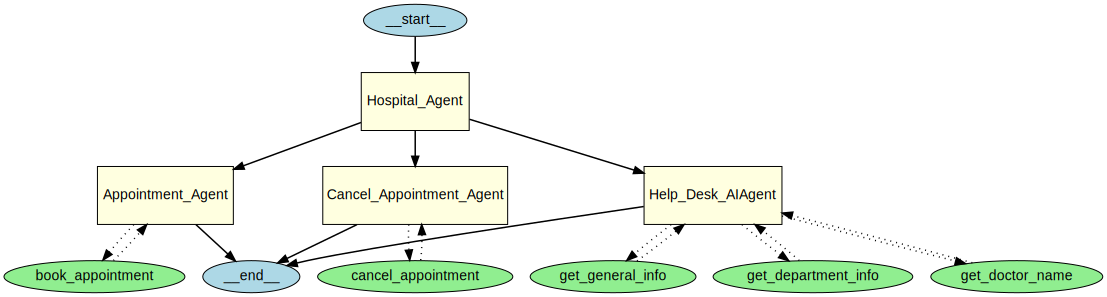

In [37]:
from agents.extensions.visualization import draw_graph

draw_graph(hospital_agent)